TEAM 5 PROJECT

OBJECTIVE
ANSWER THE NEXT QUESTION: HAVING 10 SALES REPRESENTATIVES TO COVER THE TOTAL OF THE NATIONAL TERRITORY,
¿WHERE IS THE BEST PLACE TO LOCATE THEM?

1.- KNOW THE NUMBER OF DENTISTS THAT ARE IN THE MEXICAN REPUBLIC WITH MINIMUM STATUS INFORMATION

1.1 USE GOOGLE API TO KNOW THIS INFORMATION FOR THIS IT WAS DECIDED TO MAKE THE SEARCH AT THE MUNICIPAL LEVEL BY STATE

1.1.1 A SAMPLE IS GENERATED WITH INFORMATION FROM THE MUNICIPALITIES OF THE STATE OF GUANAJUATO

In [1]:
# Create code to answer each of the following questions.
# Hint: You will need multiple target URLs and multiple API requests.

# Dependencies
import gmaps
import requests
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Google API Key
from config import gkey
gmaps.configure(api_key=gkey)

In [2]:

#busqueda de la lat y long de los municipios
LISTAESTADOS=['Guanajuato,Abasolo',	'Guanajuato,Acámbaro','Guanajuato,Apaseo el Alto','Guanajuato,Apaseo el Grande','Guanajuato,Celaya',	'Guanajuato,Ciudad Manuel Doblado',	'Guanajuato,Comonfort',	'Guanajuato,Cortazar',	'Guanajuato,Cuerámaro',	'Guanajuato,Doctor Mora',	'Guanajuato,Dolores Hidalgo Cuna de la Independencia Nacional',	'Guanajuato,Empalme Escobedo',	'Guanajuato,Guanajuato',	'Guanajuato,Huanímaro',	'Guanajuato,Irapuato',	'Guanajuato,Jaral del Progreso',	'Guanajuato,Jerécuaro',	'Guanajuato,León de los Aldama',	'Guanajuato,Marfil',	'Guanajuato,Moroleón',	'Guanajuato,Pénjamo',	'Guanajuato,Purísima de Bustos',	'Guanajuato,Rincón de Tamayo',	'Guanajuato,Romita',	'Guanajuato,Salamanca',	'Guanajuato,Salvatierra',	'Guanajuato,San Diego de la Unión',	'Guanajuato,San Francisco del Rincón',	'Guanajuato,San José Iturbide',	'Guanajuato,San Luis de la Paz',	'Guanajuato,San Miguel de Allende',	'Guanajuato,Santa Cruz Juventino Rosas',	'Guanajuato,Santiago Maravatío',	'Guanajuato,Silao',	'Guanajuato,Tarandacuao',	'Guanajuato,Uriangato',	'Guanajuato,Valle de Santiago',	'Guanajuato,Villagrán',	'Guanajuato,Yuriria']
basedentista = pd.DataFrame (columns = ['DENTIST Name','DENTIST Address','LAT','LONG','ESTADO'])

for cp in LISTAESTADOS:
    try:
        params = {
                   "address": cp,
                   "key": gkey
                 }

        base_url = "https://maps.googleapis.com/maps/api/geocode/json"

        my_geo = requests.get(base_url, params).json()

        lat = my_geo["results"][0]["geometry"]["location"]["lat"]
        lng = my_geo["results"][0]["geometry"]["location"]["lng"]

        #busqueda de los dentistas
        target_type = "dentist"
        radius = 30000

# rewrite params dict

        params = {
        "location": f"{lat},{lng}",
        "types": target_type,
        "radius": radius,
        "key": gkey
         }

# Build URL using the Google Maps API
        base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"


# Run request
        response = requests.get(base_url, params)

# print the response URL, avoid doing for public GitHub repos in order to avoid exposing key
# print(response.url)

        busquedadentista = response.json()

# Print the JSON (pretty printed)
#print(json.dumps(seattle_bikes, indent=4, sort_keys=True))
        a=len(basedentista.index)
        b=0
        for place in busquedadentista["results"]:
            basedentista.loc[a,"DENTIST Name"] = busquedadentista["results"][b]["name"]
            basedentista.loc[a,"DENTIST Address"] = busquedadentista["results"][b]["vicinity"]
            basedentista.loc[a,"DENTIST Address"] = busquedadentista["results"][b]["vicinity"]
            basedentista.loc[a,"LAT"] = busquedadentista["results"][b]["geometry"]["location"]["lat"]
            basedentista.loc[a,"LONG"] = busquedadentista["results"][b]["geometry"]["location"]["lng"]
            basedentista.loc[a,"ESTADO"] = busquedadentista["results"][b]["plus_code"]["compound_code"]
            b=b+1
            a=a+1
            
        print(f"{cp} ciudad encontrada")
    except:
        print(f"{cp} ciudad no encontrada")
        pass
#print(busquedadentista["results"][0]["name"])
#print(busquedadentista["results"][0]["vicinity"])
basedentista

Guanajuato,Abasolo ciudad encontrada
Guanajuato,Acámbaro ciudad encontrada
Guanajuato,Apaseo el Alto ciudad encontrada
Guanajuato,Apaseo el Grande ciudad encontrada
Guanajuato,Celaya ciudad encontrada
Guanajuato,Ciudad Manuel Doblado ciudad encontrada
Guanajuato,Comonfort ciudad encontrada
Guanajuato,Cortazar ciudad encontrada
Guanajuato,Cuerámaro ciudad no encontrada
Guanajuato,Doctor Mora ciudad encontrada
Guanajuato,Dolores Hidalgo Cuna de la Independencia Nacional ciudad encontrada
Guanajuato,Empalme Escobedo ciudad encontrada
Guanajuato,Guanajuato ciudad no encontrada
Guanajuato,Huanímaro ciudad encontrada
Guanajuato,Irapuato ciudad encontrada
Guanajuato,Jaral del Progreso ciudad encontrada
Guanajuato,Jerécuaro ciudad encontrada
Guanajuato,León de los Aldama ciudad encontrada
Guanajuato,Marfil ciudad no encontrada
Guanajuato,Moroleón ciudad encontrada
Guanajuato,Pénjamo ciudad no encontrada
Guanajuato,Purísima de Bustos ciudad encontrada
Guanajuato,Rincón de Tamayo ciudad encontra

,DENTIST Name,DENTIST Address,LAT,LONG,ESTADO
0,DENT-AL Odontologia Familiar y Estética.,"Ignacio Zaragoza, Zona Centro, Pénjamo",20.4277,-101.723,"C7HG+3Q Pénjamo, Guanajuato, Mexico"
1,Orthomaster Clínica Dental,"San Luis Rey 450, El Milagro, Irapuato",20.6602,-101.383,"MJ68+3V Irapuato, Guanajuato, Mexico"
2,Centro de Ortodoncia,"Gustavo Díaz Ordaz 3195, Irapuato",20.6636,-101.366,"MJ7M+CP Irapuato, Guanajuato, Mexico"
3,Zirkonzahn Mèxico SA DE CV,"Paseo Mirador del Valle 5577, Villas de Irapua...",20.69,-101.394,"MJR4+28 Villas de Irapuato, Gto., Mexico"
4,Centro de Estudios de Ortodoncia del Bajío,"Boulevard Lázaro Cárdenas 1477, Prolongacion M...",20.6774,-101.367,"MJGM+X7 Irapuato, Guanajuato, Mexico"
...,...,...,...,...,...
644,Live Smile,"Maclovio Herrera #27, Centro, Yuriria",20.2089,-101.136,"6V57+HG Yuriria, Guanajuato, Mexico"
645,Dental Life Yuriria,"A, San Cayetano 41, La Aldea, Yuriria",20.2085,-101.137,"6V57+C6 Yuriria, Guanajuato, Mexico"
646,Centro Dental Yuriria,"Estación 16, Las Flores, Yuriria",20.2097,-101.138,"6V56+VW Yuriria, Guanajuato, Mexico"
647,Oscar Ramírez Tovar,"carretera, Salvatierra - Yuriria 16, Salvatierra",20.2106,-101.14,"6V66+64 Yuriria, Guanajuato, Mexico"


In [4]:
base2 = basedentista.dropna(subset=["DENTIST Name"])
numerogoogleguanajuato=len(base2)
print (numerogoogleguanajuato)
base2


649


,DENTIST Name,DENTIST Address,LAT,LONG,ESTADO
0,DENT-AL Odontologia Familiar y Estética.,"Ignacio Zaragoza, Zona Centro, Pénjamo",20.4277,-101.723,"C7HG+3Q Pénjamo, Guanajuato, Mexico"
1,Orthomaster Clínica Dental,"San Luis Rey 450, El Milagro, Irapuato",20.6602,-101.383,"MJ68+3V Irapuato, Guanajuato, Mexico"
2,Centro de Ortodoncia,"Gustavo Díaz Ordaz 3195, Irapuato",20.6636,-101.366,"MJ7M+CP Irapuato, Guanajuato, Mexico"
3,Zirkonzahn Mèxico SA DE CV,"Paseo Mirador del Valle 5577, Villas de Irapua...",20.69,-101.394,"MJR4+28 Villas de Irapuato, Gto., Mexico"
4,Centro de Estudios de Ortodoncia del Bajío,"Boulevard Lázaro Cárdenas 1477, Prolongacion M...",20.6774,-101.367,"MJGM+X7 Irapuato, Guanajuato, Mexico"
...,...,...,...,...,...
644,Live Smile,"Maclovio Herrera #27, Centro, Yuriria",20.2089,-101.136,"6V57+HG Yuriria, Guanajuato, Mexico"
645,Dental Life Yuriria,"A, San Cayetano 41, La Aldea, Yuriria",20.2085,-101.137,"6V57+C6 Yuriria, Guanajuato, Mexico"
646,Centro Dental Yuriria,"Estación 16, Las Flores, Yuriria",20.2097,-101.138,"6V56+VW Yuriria, Guanajuato, Mexico"
647,Oscar Ramírez Tovar,"carretera, Salvatierra - Yuriria 16, Salvatierra",20.2106,-101.14,"6V66+64 Yuriria, Guanajuato, Mexico"


1.1.1 RESULT OF 694 UNIQUE DENTISTS IN THE STATE OF GUANAJUTO ACCORDING TO GOOGLE API AND GENERATED LOGIC

1.2 EXPLORE THE DATABASE OF THE 2019 CENSUS OF ECONOMIC ACTIVITIES OF MEXICO USING "Private sector dental offices  (INSERTAR LINK A BASE)


In [21]:
file_to_load = "../Output/denue_filtrado.csv"
denue_data = pd.read_csv(file_to_load, header=1, encoding = "ISO-8859-1")
denue_data

,AD ODONTOLOGIA AVANZADA,621211,Consultorios dentales del sector privado,0 a 5 personas,20127.0,1,AGUASCALIENTES,1.1,Aguascalientes,1.2,Aguascalientes.1,21.9172089,-102.313807,2019-11
0,ALFA DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20400.0,1,AGUASCALIENTES,7,RincÃ³n de Romos,1,RincÃ³n de Romos,22.230236,-102.320867,2014-12
1,ALORA +DENT DENTISTA,621211,Consultorios dentales del sector privado,0 a 5 personas,20299.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.906590,-102.240146,2019-11
2,AMG DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.880631,-102.295082,2010-07
3,ARA-DENTAL CLINIC,621211,Consultorios dentales del sector privado,0 a 5 personas,20236.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.866162,-102.308286,2019-11
4,ARTE DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.888125,-102.293216,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63372,VILLA VERDE ESPECIALIDADES DENTALES,621211,Consultorios dentales del sector privado,0 a 5 personas,98098.0,32,ZACATECAS,56,Zacatecas,1,Zacatecas,22.761511,-102.554120,2014-12
63373,VITA DENT,621211,Consultorios dentales del sector privado,0 a 5 personas,99700.0,32,ZACATECAS,48,Tlaltenango de SÃ¡nchez RomÃ¡n,1,Tlaltenango de SÃ¡nchez RomÃ¡n,21.782065,-103.300348,2019-11
63374,VITALDENT SAN JOSE,621211,Consultorios dentales del sector privado,0 a 5 personas,98300.0,32,ZACATECAS,22,Juan Aldama,1,Juan Aldama,24.291534,-103.391682,2019-11
63375,VOCA SANA,621211,Consultorios dentales del sector privado,0 a 5 personas,98619.0,32,ZACATECAS,17,Guadalupe,1,Guadalupe,22.759223,-102.538121,2019-11


In [22]:
denue_data

,AD ODONTOLOGIA AVANZADA,621211,Consultorios dentales del sector privado,0 a 5 personas,20127.0,1,AGUASCALIENTES,1.1,Aguascalientes,1.2,Aguascalientes.1,21.9172089,-102.313807,2019-11
0,ALFA DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20400.0,1,AGUASCALIENTES,7,RincÃ³n de Romos,1,RincÃ³n de Romos,22.230236,-102.320867,2014-12
1,ALORA +DENT DENTISTA,621211,Consultorios dentales del sector privado,0 a 5 personas,20299.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.906590,-102.240146,2019-11
2,AMG DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.880631,-102.295082,2010-07
3,ARA-DENTAL CLINIC,621211,Consultorios dentales del sector privado,0 a 5 personas,20236.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.866162,-102.308286,2019-11
4,ARTE DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.888125,-102.293216,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63372,VILLA VERDE ESPECIALIDADES DENTALES,621211,Consultorios dentales del sector privado,0 a 5 personas,98098.0,32,ZACATECAS,56,Zacatecas,1,Zacatecas,22.761511,-102.554120,2014-12
63373,VITA DENT,621211,Consultorios dentales del sector privado,0 a 5 personas,99700.0,32,ZACATECAS,48,Tlaltenango de SÃ¡nchez RomÃ¡n,1,Tlaltenango de SÃ¡nchez RomÃ¡n,21.782065,-103.300348,2019-11
63374,VITALDENT SAN JOSE,621211,Consultorios dentales del sector privado,0 a 5 personas,98300.0,32,ZACATECAS,22,Juan Aldama,1,Juan Aldama,24.291534,-103.391682,2019-11
63375,VOCA SANA,621211,Consultorios dentales del sector privado,0 a 5 personas,98619.0,32,ZACATECAS,17,Guadalupe,1,Guadalupe,22.759223,-102.538121,2019-11


In [23]:
denue_data.columns = ['Nombre dentista','codigo_act','nombre_actividad','per_ocu','cod_postal','cve_ent','entidad','cve_mun','municipio','cve_loc','localidad','latitud','longitud','fecha_alta']
denue_data

,Nombre dentista,codigo_act,nombre_actividad,per_ocu,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,latitud,longitud,fecha_alta
0,ALFA DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20400.0,1,AGUASCALIENTES,7,RincÃ³n de Romos,1,RincÃ³n de Romos,22.230236,-102.320867,2014-12
1,ALORA +DENT DENTISTA,621211,Consultorios dentales del sector privado,0 a 5 personas,20299.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.906590,-102.240146,2019-11
2,AMG DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.880631,-102.295082,2010-07
3,ARA-DENTAL CLINIC,621211,Consultorios dentales del sector privado,0 a 5 personas,20236.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.866162,-102.308286,2019-11
4,ARTE DENTAL,621211,Consultorios dentales del sector privado,0 a 5 personas,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,21.888125,-102.293216,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63372,VILLA VERDE ESPECIALIDADES DENTALES,621211,Consultorios dentales del sector privado,0 a 5 personas,98098.0,32,ZACATECAS,56,Zacatecas,1,Zacatecas,22.761511,-102.554120,2014-12
63373,VITA DENT,621211,Consultorios dentales del sector privado,0 a 5 personas,99700.0,32,ZACATECAS,48,Tlaltenango de SÃ¡nchez RomÃ¡n,1,Tlaltenango de SÃ¡nchez RomÃ¡n,21.782065,-103.300348,2019-11
63374,VITALDENT SAN JOSE,621211,Consultorios dentales del sector privado,0 a 5 personas,98300.0,32,ZACATECAS,22,Juan Aldama,1,Juan Aldama,24.291534,-103.391682,2019-11
63375,VOCA SANA,621211,Consultorios dentales del sector privado,0 a 5 personas,98619.0,32,ZACATECAS,17,Guadalupe,1,Guadalupe,22.759223,-102.538121,2019-11


In [24]:
denue2=denue_data.drop(columns = ['codigo_act','nombre_actividad','per_ocu','cve_ent','cve_mun','municipio','cve_loc','localidad','latitud','longitud','fecha_alta'])
denue2=denue2.drop_duplicates(ignore_index = True)
#denue_data.dropna() 
denue2

,Nombre dentista,cod_postal,entidad
0,ALFA DENTAL,20400.0,AGUASCALIENTES
1,ALORA +DENT DENTISTA,20299.0,AGUASCALIENTES
2,AMG DENTAL,20000.0,AGUASCALIENTES
3,ARA-DENTAL CLINIC,20236.0,AGUASCALIENTES
4,ARTE DENTAL,20000.0,AGUASCALIENTES
...,...,...,...
44406,VILLA VERDE ESPECIALIDADES DENTALES,98098.0,ZACATECAS
44407,VITA DENT,99700.0,ZACATECAS
44408,VITALDENT SAN JOSE,98300.0,ZACATECAS
44409,VOCA SANA,98619.0,ZACATECAS


In [25]:
numeroinegiguanajuato=len(denue2[denue2['entidad'] == 'GUANAJUATO'])
numeroinegiguanajuato

2104

1.2.1 REVIEWING THE NUMBER OF UNIQUE DENTIST IN GUANAJUATO IS 3234

<BarContainer object of 2 artists>

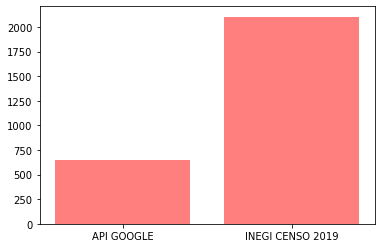

In [26]:
dentistasguana = [numerogoogleguanajuato, numeroinegiguanajuato]
x_axis = np.arange(len(dentistasguana))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["API GOOGLE","INEGI CENSO 2019"])
plt.bar(x_axis, dentistasguana, color='r', alpha=0.5, align="center")

1 CONCLUSION: WHEN COMPARING THE SAME STATE, WE FIND THAT THE INEGI DATABASE CONTAINS MORE DETAIL OF DENTIST IN MEXICO, SO WE WILL USE THIS BASE FOR OUR EXERCISE.

2 RELATED STATISTICS OF DENTISTS IN MEXICO

In [27]:
RELACIONESTADO=denue2['entidad'].value_counts()
RELACIONESTADO

MEXICO                             5185
CIUDAD DE MEXICO                   4666
JALISCO                            2747
VERACRUZ DE IGNACIO DE LA LLAVE    2445
MICHOACAN DE OCAMPO                2372
NUEVO LEON                         2162
BAJA CALIFORNIA                    2146
PUEBLA                             2108
GUANAJUATO                         2104
CHIHUAHUA                          1383
TAMAULIPAS                         1367
OAXACA                             1314
SINALOA                            1240
COAHUILA DE ZARAGOZA               1168
CHIAPAS                            1077
SAN LUIS POTOSI                    1011
HIDALGO                             996
SONORA                              956
QUERETARO                           938
GUERRERO                            842
MORELOS                             808
YUCATAN                             751
ZACATECAS                           700
AGUASCALIENTES                      608
NAYARIT                             547


In [28]:
RELACIONESTADODENTIS = pd.DataFrame(denue2['entidad'].value_counts().reset_index().values, columns=["ESTADO", "NODENTISTAS"])
RELACIONESTADODENTIS

,ESTADO,NODENTISTAS
0,MEXICO,5185
1,CIUDAD DE MEXICO,4666
2,JALISCO,2747
3,VERACRUZ DE IGNACIO DE LA LLAVE,2445
4,MICHOACAN DE OCAMPO,2372
5,NUEVO LEON,2162
6,BAJA CALIFORNIA,2146
7,PUEBLA,2108
8,GUANAJUATO,2104
9,CHIHUAHUA,1383


In [29]:
RELACIONESTADODENTIS['%SHARE'] = (RELACIONESTADODENTIS.NODENTISTAS / sum(RELACIONESTADODENTIS["NODENTISTAS"]))*100
RELACIONESTADODENTIS

,ESTADO,NODENTISTAS,%SHARE
0,MEXICO,5185,11.675
1,CIUDAD DE MEXICO,4666,10.5064
2,JALISCO,2747,6.1854
3,VERACRUZ DE IGNACIO DE LA LLAVE,2445,5.50539
4,MICHOACAN DE OCAMPO,2372,5.34102
5,NUEVO LEON,2162,4.86816
6,BAJA CALIFORNIA,2146,4.83214
7,PUEBLA,2108,4.74657
8,GUANAJUATO,2104,4.73757
9,CHIHUAHUA,1383,3.11409


In [31]:
file_to_load = "../Resources/estadospoblacion.csv"
poblacionxestado = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
poblacionxestado.columns = ['ESTADO','POBLACION']
poblacionxestado.head()

,ESTADO,POBLACION
0,AGUASCALIENTES,1184996
1,BAJA CALIFORNIA,3155070
2,BAJA CALIFORNIA SUR,637026
3,CAMPECHE,822441
4,COAHUILA DE ZARAGOZA,2748391


In [32]:
MERGEESTADODENTIS = pd.merge(RELACIONESTADODENTIS, poblacionxestado, on="ESTADO")
MERGEESTADODENTIS['ESTADO'] = MERGEESTADODENTIS['ESTADO'].replace(
    {'BAJA CALIFORNIA': 'BAJA CALIFORNIA NORTE, MEXICO', 'SONORA': 'SONORA, MEXICO','DURANGO':'DURANGO, MEXICO','MEXICO':'ESTADO DE MEXICO,MEXICO'})
MERGEESTADODENTIS

,ESTADO,NODENTISTAS,%SHARE,POBLACION
0,"ESTADO DE MEXICO,MEXICO",5185,11.675,15175862
1,CIUDAD DE MEXICO,4666,10.5064,8851080
2,JALISCO,2747,6.1854,7350682
3,VERACRUZ DE IGNACIO DE LA LLAVE,2445,5.50539,7643194
4,MICHOACAN DE OCAMPO,2372,5.34102,4351037
5,NUEVO LEON,2162,4.86816,4653458
6,"BAJA CALIFORNIA NORTE, MEXICO",2146,4.83214,3155070
7,PUEBLA,2108,4.74657,5779829
8,GUANAJUATO,2104,4.73757,5486372
9,CHIHUAHUA,1383,3.11409,3406465


In [33]:
#In order to get Municipalities latittude and longitude, Run a request to endpoint and convert result to jsonLISTAESTADOS=MERGEESTADODENTIS["ESTADO"]
LISTAESTADOS=MERGEESTADODENTIS["ESTADO"]
baselatlon= pd.DataFrame (columns = ['ESTADO','LAT','LONG'])
a=0
for cp in LISTAESTADOS:
    try:
        params = {
                   "address": cp,
                   "key": gkey
                 }

        base_url = "https://maps.googleapis.com/maps/api/geocode/json"

        my_geo = requests.get(base_url, params).json()

        lat = my_geo["results"][0]["geometry"]["location"]["lat"]
        lng = my_geo["results"][0]["geometry"]["location"]["lng"]


        baselatlon.loc[a,"ESTADO"] = cp
        baselatlon.loc[a,"LAT"] = lat
        baselatlon.loc[a,"LONG"] = lng
        a=a+1
            
        print(f"{cp} Estado encontrada")
    except:
        print(f"{cp} Estado no encontrado")
        a=a+1
        pass
#print(busquedadentista["results"][0]["name"])
#print(busquedadentista["results"][0]["vicinity"])
baselatlon

ESTADO DE MEXICO,MEXICO Estado encontrada
CIUDAD DE MEXICO Estado encontrada
JALISCO Estado encontrada
VERACRUZ DE IGNACIO DE LA LLAVE Estado encontrada
MICHOACAN DE OCAMPO Estado encontrada
NUEVO LEON Estado encontrada
BAJA CALIFORNIA NORTE, MEXICO Estado encontrada
PUEBLA Estado encontrada
GUANAJUATO Estado encontrada
CHIHUAHUA Estado encontrada
TAMAULIPAS Estado encontrada
OAXACA Estado encontrada
SINALOA Estado encontrada
COAHUILA DE ZARAGOZA Estado encontrada
CHIAPAS Estado encontrada
SAN LUIS POTOSI Estado encontrada
HIDALGO Estado encontrada
SONORA, MEXICO Estado encontrada
QUERETARO Estado encontrada
GUERRERO Estado encontrada
MORELOS Estado encontrada
YUCATAN Estado encontrada
ZACATECAS Estado encontrada
AGUASCALIENTES Estado encontrada
NAYARIT Estado encontrada
DURANGO, MEXICO Estado encontrada
TABASCO Estado encontrada
TLAXCALA Estado encontrada
QUINTANA ROO Estado encontrada
BAJA CALIFORNIA SUR Estado encontrada
COLIMA Estado encontrada
CAMPECHE Estado encontrada


,ESTADO,LAT,LONG
0,"ESTADO DE MEXICO,MEXICO",19.4969,-99.7233
1,CIUDAD DE MEXICO,19.4326,-99.1332
2,JALISCO,20.6595,-103.349
3,VERACRUZ DE IGNACIO DE LA LLAVE,19.2602,-96.5783
4,MICHOACAN DE OCAMPO,19.5665,-101.707
5,NUEVO LEON,25.5922,-99.9962
6,"BAJA CALIFORNIA NORTE, MEXICO",30.8406,-115.284
7,PUEBLA,19.0414,-98.2063
8,GUANAJUATO,21.019,-101.257
9,CHIHUAHUA,28.633,-106.069


In [34]:
MERGEESTADODENTISGEO = pd.merge(MERGEESTADODENTIS, baselatlon, on="ESTADO")
MERGEESTADODENTISGEO["POBLACION"] = MERGEESTADODENTISGEO["POBLACION"].apply(pd.to_numeric)
MERGEESTADODENTISGEO2=MERGEESTADODENTISGEO.set_index('ESTADO')
MERGEESTADODENTISGEO ['ESTADO'] = MERGEESTADODENTISGEO ['ESTADO'].replace(
    {'BAJA CALIFORNIA NORTE, MEXICO':'BAJA CALIFORNIA', 'SONORA, MEXICO':'SONORA','DURANGO, MEXICO':'DURANGO','ESTADO DE MEXICO,MEXICO':'MEXICO'})
MERGEESTADODENTISGEO['POBLACIONK'] = (MERGEESTADODENTISGEO.POBLACION / 1000)
MERGEESTADODENTISGEO 

,ESTADO,NODENTISTAS,%SHARE,POBLACION,LAT,LONG,POBLACIONK
0,MEXICO,5185,11.675,15175862,19.4969,-99.7233,15175.862
1,CIUDAD DE MEXICO,4666,10.5064,8851080,19.4326,-99.1332,8851.080
2,JALISCO,2747,6.1854,7350682,20.6595,-103.349,7350.682
3,VERACRUZ DE IGNACIO DE LA LLAVE,2445,5.50539,7643194,19.2602,-96.5783,7643.194
4,MICHOACAN DE OCAMPO,2372,5.34102,4351037,19.5665,-101.707,4351.037
5,NUEVO LEON,2162,4.86816,4653458,25.5922,-99.9962,4653.458
6,BAJA CALIFORNIA,2146,4.83214,3155070,30.8406,-115.284,3155.070
7,PUEBLA,2108,4.74657,5779829,19.0414,-98.2063,5779.829
8,GUANAJUATO,2104,4.73757,5486372,21.019,-101.257,5486.372
9,CHIHUAHUA,1383,3.11409,3406465,28.633,-106.069,3406.465


In [36]:
file_to_load = "../Resources/EXTENSIONTERRITORIAL.csv"
extensionxestado = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
extensionxestado.columns = ['ESTADO','EXTENSIONKM']
extensionxestado.head()

,ESTADO,EXTENSIONKM
0,CHIHUAHUA,247455
1,SONORA,179355
2,COAHUILA DE ZARAGOZA,151562
3,DURANGO,123317
4,OAXACA,93757


In [37]:
MERGEESTADODENTISGEO = pd.merge(MERGEESTADODENTISGEO , extensionxestado, on="ESTADO")
MERGEESTADODENTISGEO['EXTENSIONKMK'] = (MERGEESTADODENTISGEO.EXTENSIONKM/100)
MERGEESTADODENTISGEO['POBLA/km2'] = (MERGEESTADODENTISGEO.POBLACION/MERGEESTADODENTISGEO.EXTENSIONKM)
MERGEESTADODENTISGEO['DENTISTAS/km2'] = (MERGEESTADODENTISGEO.EXTENSIONKM/MERGEESTADODENTISGEO.NODENTISTAS)
MERGEESTADODENTISGEO['DENTISTAS/POBLACION'] = (MERGEESTADODENTISGEO.POBLACION/MERGEESTADODENTISGEO.NODENTISTAS)
#cambiar division entre poblacion /dentis
#EXPORTAR BASE A CSV RESUMEN AGREGAR ELENA
MERGEESTADODENTISGEO

,ESTADO,NODENTISTAS,%SHARE,POBLACION,LAT,LONG,POBLACIONK,EXTENSIONKM,EXTENSIONKMK,POBLA/km2,DENTISTAS/km2,DENTISTAS/POBLACION
0,MEXICO,5185,11.675,15175862,19.4969,-99.7233,15175.862,22351,223.51,678.979106,4.3107,2926.88
1,CIUDAD DE MEXICO,4666,10.5064,8851080,19.4326,-99.1332,8851.080,1495,14.95,5920.454849,0.320403,1896.93
2,JALISCO,2747,6.1854,7350682,20.6595,-103.349,7350.682,78588,785.88,93.534407,28.6087,2675.89
3,VERACRUZ DE IGNACIO DE LA LLAVE,2445,5.50539,7643194,19.2602,-96.5783,7643.194,71826,718.26,106.412636,29.3767,3126.05
4,MICHOACAN DE OCAMPO,2372,5.34102,4351037,19.5665,-101.707,4351.037,58599,585.99,74.251045,24.7045,1834.33
5,NUEVO LEON,2162,4.86816,4653458,25.5922,-99.9962,4653.458,64156,641.56,72.533481,29.6744,2152.39
6,BAJA CALIFORNIA,2146,4.83214,3155070,30.8406,-115.284,3155.070,71450,714.50,44.157733,33.2945,1470.21
7,PUEBLA,2108,4.74657,5779829,19.0414,-98.2063,5779.829,34306,343.06,168.478663,16.2742,2741.85
8,GUANAJUATO,2104,4.73757,5486372,21.019,-101.257,5486.372,30608,306.08,179.246341,14.5475,2607.59
9,CHIHUAHUA,1383,3.11409,3406465,28.633,-106.069,3406.465,247455,2474.55,13.765998,178.926,2463.1


In [38]:
file_to_load = "../Output/PODERAQUISITIVOPORESTADO.csv"
PODERADQUISI = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
PODERADQUISI .columns = ['ESTADO','PODERADQUISITIVO']
PODERADQUISI.head()


,ESTADO,PODERADQUISITIVO
0,AGUASCALIENTES,11100
1,BAJA CALIFORNIA,10500
2,BAJA CALIFORNIA SUR,10800
3,CAMPECHE,9900
4,COAHUILA DE ZARAGOZA,10700


In [39]:
MERGEESTADODENTISGEO3 = pd.merge(MERGEESTADODENTISGEO, PODERADQUISI, on="ESTADO")
MERGEESTADODENTISGEO3

,ESTADO,NODENTISTAS,%SHARE,POBLACION,LAT,LONG,POBLACIONK,EXTENSIONKM,EXTENSIONKMK,POBLA/km2,DENTISTAS/km2,DENTISTAS/POBLACION,PODERADQUISITIVO
0,MEXICO,5185,11.675,15175862,19.4969,-99.7233,15175.862,22351,223.51,678.979106,4.3107,2926.88,10300
1,CIUDAD DE MEXICO,4666,10.5064,8851080,19.4326,-99.1332,8851.080,1495,14.95,5920.454849,0.320403,1896.93,11700
2,JALISCO,2747,6.1854,7350682,20.6595,-103.349,7350.682,78588,785.88,93.534407,28.6087,2675.89,11200
3,VERACRUZ DE IGNACIO DE LA LLAVE,2445,5.50539,7643194,19.2602,-96.5783,7643.194,71826,718.26,106.412636,29.3767,3126.05,9000
4,MICHOACAN DE OCAMPO,2372,5.34102,4351037,19.5665,-101.707,4351.037,58599,585.99,74.251045,24.7045,1834.33,10000
5,NUEVO LEON,2162,4.86816,4653458,25.5922,-99.9962,4653.458,64156,641.56,72.533481,29.6744,2152.39,10200
6,BAJA CALIFORNIA,2146,4.83214,3155070,30.8406,-115.284,3155.070,71450,714.50,44.157733,33.2945,1470.21,10500
7,PUEBLA,2108,4.74657,5779829,19.0414,-98.2063,5779.829,34306,343.06,168.478663,16.2742,2741.85,9300
8,GUANAJUATO,2104,4.73757,5486372,21.019,-101.257,5486.372,30608,306.08,179.246341,14.5475,2607.59,10500
9,CHIHUAHUA,1383,3.11409,3406465,28.633,-106.069,3406.465,247455,2474.55,13.765998,178.926,2463.1,10300


In [42]:
# Export file as a CSV, without the Pandas index, but with the header
MERGEESTADODENTISGEO3.to_csv("../Output/ARCHIVOFINAL.csv", index=False, header=True)

ESTADOS CON MAYOR CANTIDAD DE DENTISTAS

<BarContainer object of 32 artists>

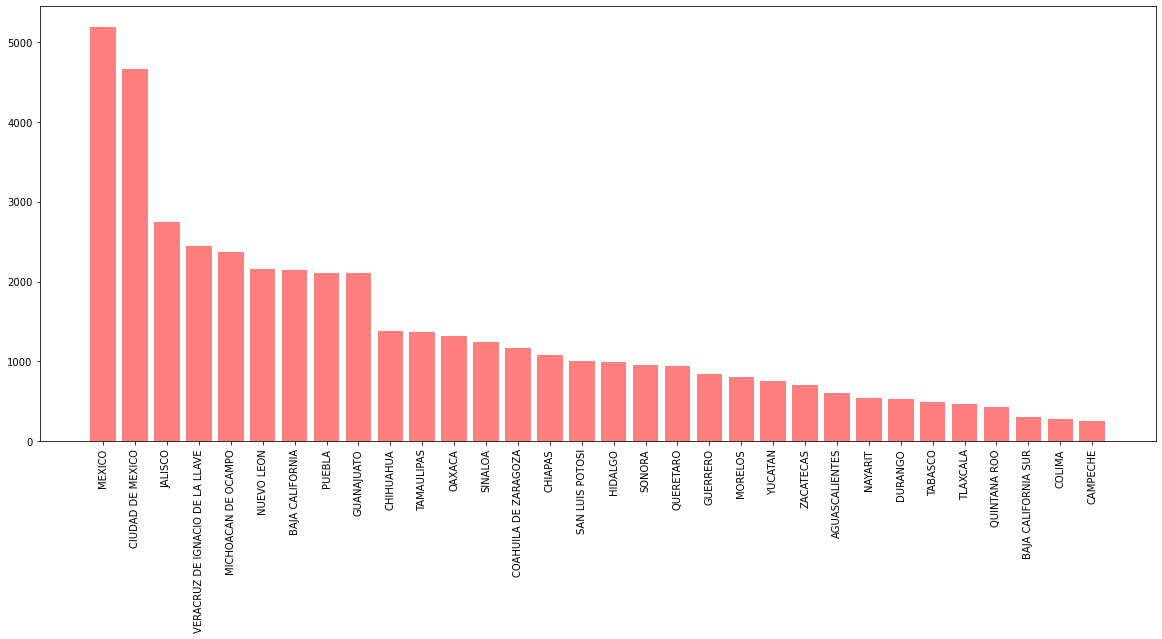

In [43]:
dentistasxestado = MERGEESTADODENTISGEO["NODENTISTAS"]
x_axis = np.arange(len(dentistasxestado))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,8)) 
plt.xticks(tick_locations, MERGEESTADODENTISGEO["ESTADO"],rotation='vertical')
plt.bar(x_axis, dentistasxestado, color='r', alpha=0.5, align="center")

GRAFICA DE BARRAS RELACIONAL ENTRE NUMERO DE DENTISTAS, POBLACION (X1000), EXTENSION EN KM

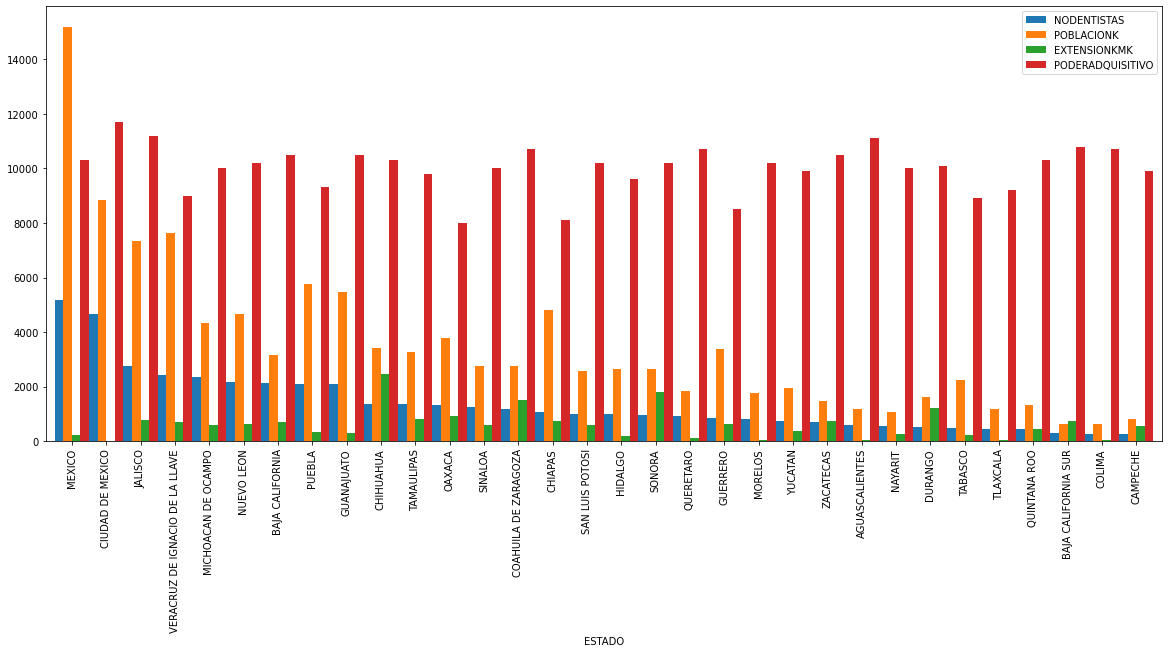

In [47]:
MERGEESTADODENTISGEO3.plot(x="ESTADO",y=["NODENTISTAS","POBLACIONK","EXTENSIONKMK","PODERADQUISITIVO"],kind="bar",figsize=(20,8),width=1)

RELACION POBLACION Y CANTIDAD DE DENTISTAS

In [48]:
denue_data['per_ocu'].value_counts()

0 a 5 personas        61522
6 a 10 personas        1440
11 a 30 personas        390
31 a 50 personas         22
51 a 100 personas         2
101 a 250 personas        1
Name: per_ocu, dtype: int64

In [49]:
RELACIONTAMAÑO = pd.DataFrame(denue_data['per_ocu'].value_counts().reset_index().values, columns=["TAMAÑO", "NODENTISTAS"])
RELACIONTAMAÑO

,TAMAÑO,NODENTISTAS
0,0 a 5 personas,61522
1,6 a 10 personas,1440
2,11 a 30 personas,390
3,31 a 50 personas,22
4,51 a 100 personas,2
5,101 a 250 personas,1


TAMAÑO DE LOS CONSULTORIOS DENTALES

([<matplotlib.patches.Wedge at 0x1fcd595c820>,
 [Text(0.7741643253009831, -0.7814535158480469, '0 a 5 personas'),
  Text(-0.7579260127996285, 0.7972127439533675, '6 a 10 personas'),
  Text(-0.8270281043473123, 0.725275474988429, '11 a 30 personas'),
  Text(-0.8416667680772295, 0.7082351668156781, '31 a 50 personas'),
  Text(-0.8425087440964686, 0.7072333533714253, '51 a 100 personas'),
  Text(-0.8426139072744255, 0.7071080562882351, '101 a 250 personas')],
 [Text(0.4222714501641726, -0.4262473722807528, '97.1%'),
  Text(-0.4134141887997973, 0.43484331488365496, '2.3%'),
  Text(-0.4511062387348975, 0.39560480453914304, '0.6%'),
  Text(-0.45909096440576147, 0.38631009099036984, '0.0%'),
  Text(-0.4595502240526192, 0.3857636472935047, '0.0%'),
  Text(-0.4596075857860502, 0.3856953034299464, '0.0%')])

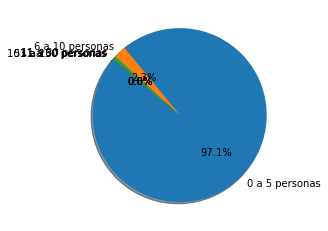

In [50]:
# Labels for the sections of our pie chart
labels = RELACIONTAMAÑO["TAMAÑO"]

# The values of each section of the pie chart
sizes = RELACIONTAMAÑO["NODENTISTAS"]

# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)
plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [52]:
file_to_load = "../Resources/baserep.csv"
baserep = pd.read_csv(file_to_load, encoding = "ISO-8859-1")
baserep.columns = ['representante','lat','log']
baserep.head()

,representante,lat,log
0,rep1,21.892991,-102.271119
1,rep2,20.521944,-100.797560
2,rep3,19.652239,-99.208437
3,rep4,19.048204,-98.205904
4,rep5,19.067304,-98.301464


POPULATION QUANTITY HEATMAP

In [53]:
locations = MERGEESTADODENTISGEO[["LAT", "LONG"]]
cantpobla =MERGEESTADODENTISGEO["POBLACION"].astype(float)
cantdenti =MERGEESTADODENTISGEO["NODENTISTAS"].astype(float)
extensionk =MERGEESTADODENTISGEO["EXTENSIONKM"].astype(float)
dentpobla =MERGEESTADODENTISGEO["DENTISTAS/POBLACION"].astype(float)
dentkm =MERGEESTADODENTISGEO["DENTISTAS/km2"].astype(float)
marker_locations = baserep[['lat', 'log']]

# Plot Heatmap
fig = gmaps.figure()
#markers = gmaps.marker_layer(marker_locations)
#fig.add_layer(markers)
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=cantpobla, 
                                 dissipating=False, max_intensity=1600000,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

NUMBER OF DENTIST HEATMAP

In [54]:
# Create heat CANTDENTISTAS
fig2 = gmaps.figure()
CANTDENTISTAS_layer = gmaps.heatmap_layer(locations, weights=cantdenti, 
                                 dissipating=False, max_intensity=5000,
                                 point_radius=1)
#markers = gmaps.marker_layer(marker_locations)
#fig.add_layer(markers)

# Add layer
fig2.add_layer(CANTDENTISTAS_layer)
# Display figure
fig2

Figure(layout=FigureLayout(height='420px'))

IN CASE OF MAPPING EACH DENTIST

In [56]:
#mapear el total de los dentistas pero son demasiados registros
#coordinates =denue_data[['latitud', "longitud"]]
#figure_layout = {
#    'width': '400px',
#    'height': '300px',
#    'border': '1px solid black',
#    'padding': '1px',
#    'margin': '0 auto 0 auto'
#}
#fig2 = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
#markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
#fig2.add_layer(markers)
#fig2

#EXTENSION TERRITORIAL KM2

KM2 TERRITORY BY STATE

In [57]:
# Create heat CANTDENTISTAS
fig3 = gmaps.figure()
extensionkm_layer = gmaps.heatmap_layer(locations, weights=extensionk, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius=1)
#markers = gmaps.marker_layer(marker_locations)
#fig3.add_layer(markers)

# Add layer
fig3.add_layer(extensionkm_layer)
# Display figure
fig3

Figure(layout=FigureLayout(height='420px'))

PEOPLE FOR EACH DENTIST BY STATE

In [58]:
# Create heat CANTDENTISTAS
fig4 = gmaps.figure()
dentispoblacion_layer = gmaps.heatmap_layer(locations, weights=dentpobla, 
                                 dissipating=False, max_intensity=3000,
                                 point_radius=1)
#markers = gmaps.marker_layer(marker_locations)
#fig4.add_layer(markers)
# Add layer
fig4.add_layer(dentispoblacion_layer)
# Display figure
fig4

Figure(layout=FigureLayout(height='420px'))

DENTIST BY KM2

In [59]:
# Create heat CANTDENTISTAS
fig5 = gmaps.figure()
dentskm_layer = gmaps.heatmap_layer(locations, weights=dentkm, 
                                 dissipating=False, max_intensity=150,
                                 point_radius=1)
#markers = gmaps.marker_layer(marker_locations)
#fig5.add_layer(markers)

# Add layer
fig5.add_layer(dentskm_layer)
# Display figure
fig5

Figure(layout=FigureLayout(height='420px'))

In [60]:

# Create a map using state centroid coordinates to set markers


# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
#markers = gmaps.marker_layer(marker_locations)
#fig.add_layer(markers)
CANTDENTISTAS_layer = gmaps.heatmap_layer(locations, weights=cantdenti, 
                                 dissipating=False, max_intensity=5000,
                                 point_radius=1)
fig.add_layer(CANTDENTISTAS_layer)
fig
# Create heat layer


Figure(layout=FigureLayout(height='420px'))